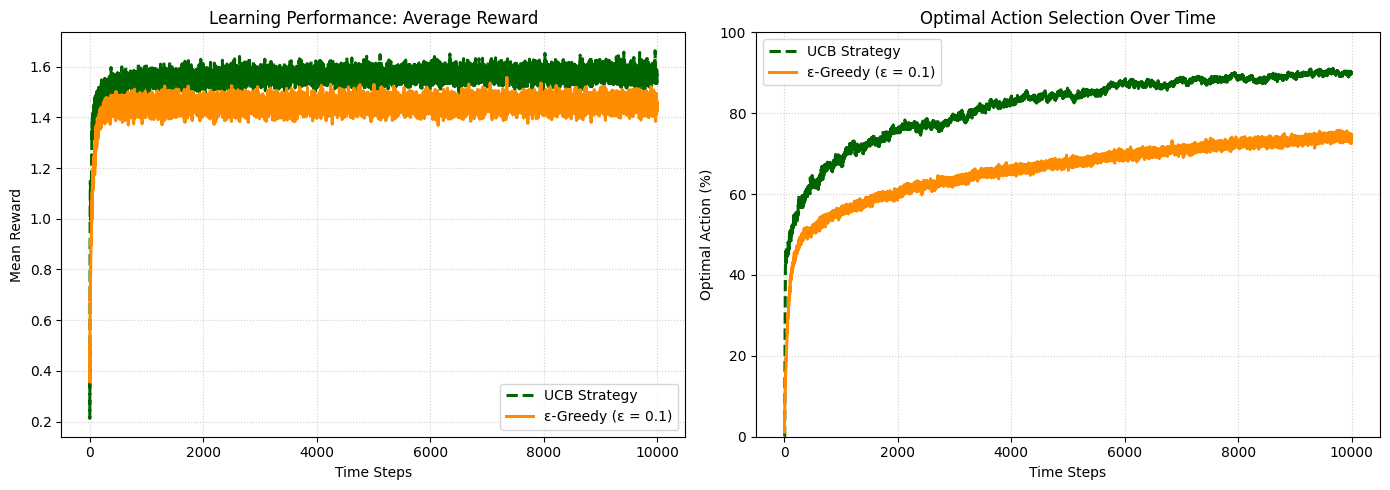

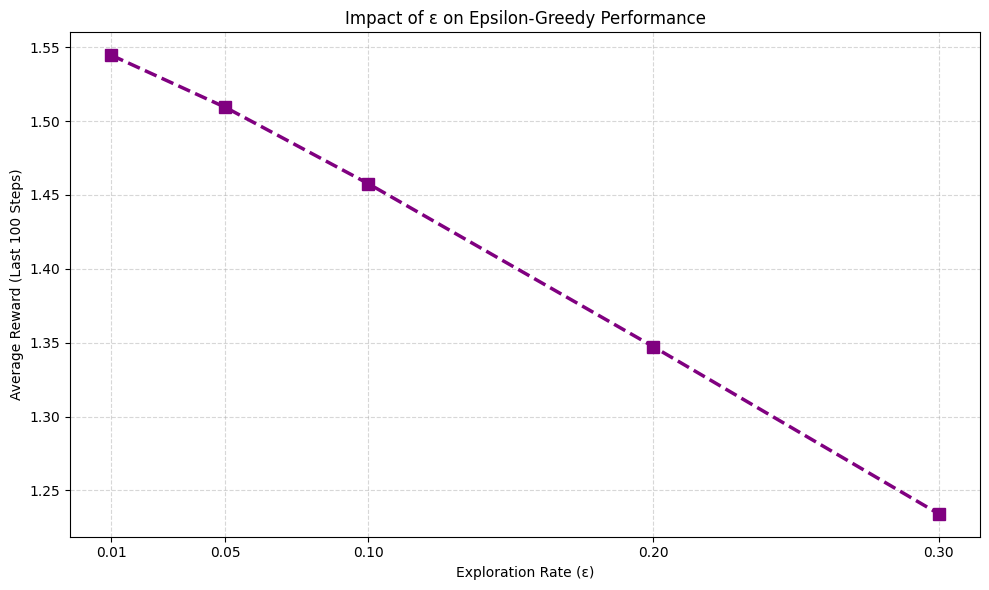

In [ ]:
# ============================================================
# Multi-Armed Bandit: UCB vs Epsilon-Greedy
# (Logic unchanged | Style + readability improved)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Global Settings
# ----------------------------
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

NUM_ARMS = 10
TIME_STEPS = 10000
RUNS = 2000

TRUE_MEANS = np.random.normal(0, 1, NUM_ARMS)
OPTIMAL_ACTION = np.argmax(TRUE_MEANS)

# ============================================================
# Upper Confidence Bound (UCB) Algorithm
# ============================================================
def run_ucb():
    Q = np.zeros(NUM_ARMS)
    N = np.zeros(NUM_ARMS)

    rewards = np.zeros(TIME_STEPS)
    optimal_action_tracker = np.zeros(TIME_STEPS)

    for t in range(TIME_STEPS):
        confidence_term = np.sqrt(2 * np.log(t + 1) / (N + 1))
        ucb_score = Q + confidence_term
        selected_action = np.argmax(ucb_score)

        reward = np.random.normal(TRUE_MEANS[selected_action], 1)

        N[selected_action] += 1
        Q[selected_action] += (reward - Q[selected_action]) / N[selected_action]

        rewards[t] = reward
        optimal_action_tracker[t] = (selected_action == OPTIMAL_ACTION)

    return rewards, optimal_action_tracker


# ============================================================
# Epsilon-Greedy Algorithm
# ============================================================
def run_epsilon_greedy(epsilon=0.1):
    Q = np.zeros(NUM_ARMS)
    N = np.zeros(NUM_ARMS)

    rewards = np.zeros(TIME_STEPS)
    optimal_action_tracker = np.zeros(TIME_STEPS)

    for t in range(TIME_STEPS):
        if np.random.rand() < epsilon:
            selected_action = np.random.randint(NUM_ARMS)
        else:
            selected_action = np.argmax(Q)

        reward = np.random.normal(TRUE_MEANS[selected_action], 1)

        N[selected_action] += 1
        Q[selected_action] += (reward - Q[selected_action]) / N[selected_action]

        rewards[t] = reward
        optimal_action_tracker[t] = (selected_action == OPTIMAL_ACTION)

    return rewards, optimal_action_tracker


# ============================================================
# Experiment 1: Compare UCB vs Epsilon-Greedy
# ============================================================
ucb_rewards_all = np.zeros((RUNS, TIME_STEPS))
eg_rewards_all = np.zeros((RUNS, TIME_STEPS))

ucb_optimal_all = np.zeros((RUNS, TIME_STEPS))
eg_optimal_all = np.zeros((RUNS, TIME_STEPS))

for run in range(RUNS):
    rewards_ucb, optimal_ucb = run_ucb()
    rewards_eg, optimal_eg = run_epsilon_greedy(epsilon=0.1)

    ucb_rewards_all[run] = rewards_ucb
    eg_rewards_all[run] = rewards_eg

    ucb_optimal_all[run] = optimal_ucb
    eg_optimal_all[run] = optimal_eg


rewards_ucb = np.mean(ucb_rewards_all, axis=0)
rewards_eg = np.mean(eg_rewards_all, axis=0)

optimal_ucb = np.mean(ucb_optimal_all, axis=0)
optimal_eg = np.mean(eg_optimal_all, axis=0)

# ============================================================
# Visualization: Strategy Comparison
# ============================================================
plt.figure(figsize=(14, 5))

# ---- Average Reward ----
plt.subplot(1, 2, 1)
plt.plot(rewards_ucb, linestyle='--', linewidth=2.2,
         color='darkgreen', label='UCB Strategy')
plt.plot(rewards_eg, linestyle='-', linewidth=2.2,
         color='darkorange', label='ε-Greedy (ε = 0.1)')

plt.xlabel('Time Steps')
plt.ylabel('Mean Reward')
plt.title('Learning Performance: Average Reward')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# ---- Optimal Action ----
plt.subplot(1, 2, 2)
plt.plot(optimal_ucb * 100, linestyle='--', linewidth=2.2,
         color='darkgreen', label='UCB Strategy')
plt.plot(optimal_eg * 100, linestyle='-', linewidth=2.2,
         color='darkorange', label='ε-Greedy (ε = 0.1)')

plt.xlabel('Time Steps')
plt.ylabel('Optimal Action (%)')
plt.title('Optimal Action Selection Over Time')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.savefig("bandit_strategy_comparison.png", dpi=300)
plt.show()


# ============================================================
# Experiment 2: Effect of Different ε Values
# ============================================================
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3]
final_rewards_eg = []

for eps in epsilon_values:
    rewards_runs = []

    for _ in range(RUNS):
        rewards, _ = run_epsilon_greedy(epsilon=eps)
        rewards_runs.append(np.mean(rewards[-100:]))

    final_rewards_eg.append(np.mean(rewards_runs))


# ============================================================
# Visualization: Epsilon Sensitivity
# ============================================================
plt.figure(figsize=(10, 6))
plt.plot(
    epsilon_values,
    final_rewards_eg,
    marker='s',
    linestyle='--',
    linewidth=2.5,
    markersize=8,
    color='purple'
)

plt.xlabel('Exploration Rate (ε)')
plt.ylabel('Average Reward (Last 100 Steps)')
plt.title('Impact of ε on Epsilon-Greedy Performance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(epsilon_values)

plt.tight_layout()
plt.savefig("epsilon_effect_analysis.png", dpi=300)
plt.show()

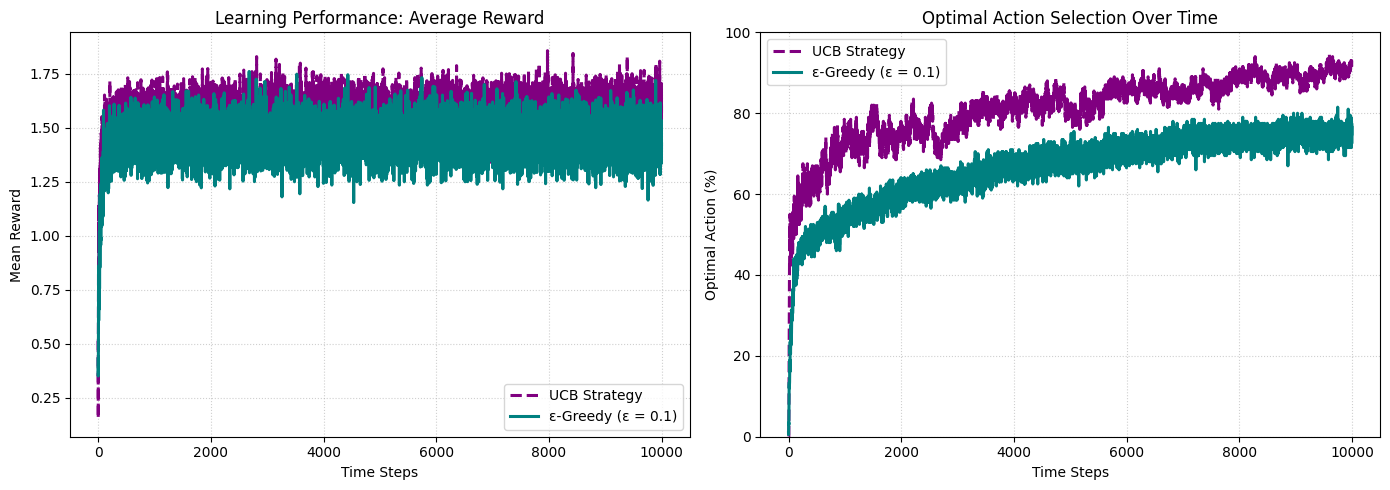

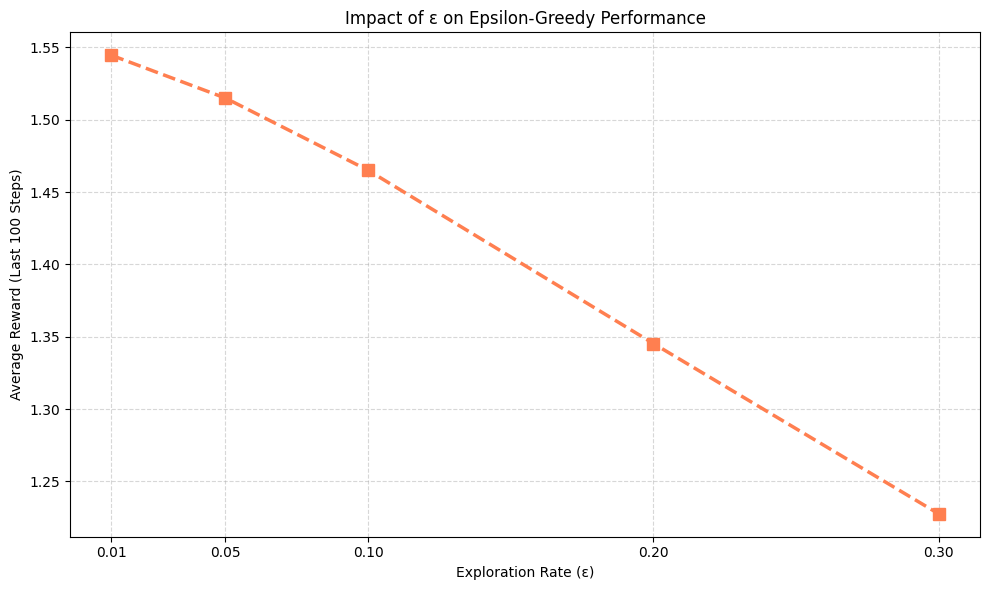

In [3]:
# ============================================================
# Multi-Armed Bandit: UCB vs Epsilon-Greedy
# (Logic unchanged | Style + readability improved)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Global Settings
# ----------------------------
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

NUM_ARMS = 10
TIME_STEPS = 10000
RUNS = 200

TRUE_MEANS = np.random.normal(0, 1, NUM_ARMS)
OPTIMAL_ACTION = np.argmax(TRUE_MEANS)

# ============================================================
# Upper Confidence Bound (UCB) Algorithm
# ============================================================
def run_ucb():
    Q = np.zeros(NUM_ARMS)
    N = np.zeros(NUM_ARMS)

    rewards = np.zeros(TIME_STEPS)
    optimal_action_tracker = np.zeros(TIME_STEPS)

    for t in range(TIME_STEPS):
        confidence_term = np.sqrt(2 * np.log(t + 1) / (N + 1))
        ucb_score = Q + confidence_term
        selected_action = np.argmax(ucb_score)

        reward = np.random.normal(TRUE_MEANS[selected_action], 1)

        N[selected_action] += 1
        Q[selected_action] += (reward - Q[selected_action]) / N[selected_action]

        rewards[t] = reward
        optimal_action_tracker[t] = (selected_action == OPTIMAL_ACTION)

    return rewards, optimal_action_tracker


# ============================================================
# Epsilon-Greedy Algorithm
# ============================================================
def run_epsilon_greedy(epsilon=0.1):
    Q = np.zeros(NUM_ARMS)
    N = np.zeros(NUM_ARMS)

    rewards = np.zeros(TIME_STEPS)
    optimal_action_tracker = np.zeros(TIME_STEPS)

    for t in range(TIME_STEPS):
        if np.random.rand() < epsilon:
            selected_action = np.random.randint(NUM_ARMS)
        else:
            selected_action = np.argmax(Q)

        reward = np.random.normal(TRUE_MEANS[selected_action], 1)

        N[selected_action] += 1
        Q[selected_action] += (reward - Q[selected_action]) / N[selected_action]

        rewards[t] = reward
        optimal_action_tracker[t] = (selected_action == OPTIMAL_ACTION)

    return rewards, optimal_action_tracker


# ============================================================
# Experiment 1: Compare UCB vs Epsilon-Greedy
# ============================================================
ucb_rewards_all = np.zeros((RUNS, TIME_STEPS))
eg_rewards_all = np.zeros((RUNS, TIME_STEPS))

ucb_optimal_all = np.zeros((RUNS, TIME_STEPS))
eg_optimal_all = np.zeros((RUNS, TIME_STEPS))

for run in range(RUNS):
    rewards_ucb, optimal_ucb = run_ucb()
    rewards_eg, optimal_eg = run_epsilon_greedy(epsilon=0.1)

    ucb_rewards_all[run] = rewards_ucb
    eg_rewards_all[run] = rewards_eg

    ucb_optimal_all[run] = optimal_ucb
    eg_optimal_all[run] = optimal_eg


rewards_ucb = np.mean(ucb_rewards_all, axis=0)
rewards_eg = np.mean(eg_rewards_all, axis=0)

optimal_ucb = np.mean(ucb_optimal_all, axis=0)
optimal_eg = np.mean(eg_optimal_all, axis=0)

# ============================================================
# Visualization: Strategy Comparison
# ============================================================
plt.figure(figsize=(14, 5))

# ---- Average Reward ----
plt.subplot(1, 2, 1)
plt.plot(rewards_ucb, linestyle='--', linewidth=2.2,
         color='purple', label='UCB Strategy')
plt.plot(rewards_eg, linestyle='-', linewidth=2.2,
         color='teal', label='ε-Greedy (ε = 0.1)')

plt.xlabel('Time Steps')
plt.ylabel('Mean Reward')
plt.title('Learning Performance: Average Reward')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# ---- Optimal Action ----
plt.subplot(1, 2, 2)
plt.plot(optimal_ucb * 100, linestyle='--', linewidth=2.2,
         color='purple', label='UCB Strategy')
plt.plot(optimal_eg * 100, linestyle='-', linewidth=2.2,
         color='teal', label='ε-Greedy (ε = 0.1)')

plt.xlabel('Time Steps')
plt.ylabel('Optimal Action (%)')
plt.title('Optimal Action Selection Over Time')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.savefig("bandit_strategy_comparison.png", dpi=300)
plt.show()


# ============================================================
# Experiment 2: Effect of Different ε Values
# ============================================================
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3]
final_rewards_eg = []

for eps in epsilon_values:
    rewards_runs = []

    for _ in range(RUNS):
        rewards, _ = run_epsilon_greedy(epsilon=eps)
        rewards_runs.append(np.mean(rewards[-100:]))

    final_rewards_eg.append(np.mean(rewards_runs))


# ============================================================
# Visualization: Epsilon Sensitivity
# ============================================================
plt.figure(figsize=(10, 6))
plt.plot(
    epsilon_values,
    final_rewards_eg,
    marker='s',
    linestyle='--',
    linewidth=2.5,
    markersize=8,
    color='coral'
)

plt.xlabel('Exploration Rate (ε)')
plt.ylabel('Average Reward (Last 100 Steps)')
plt.title('Impact of ε on Epsilon-Greedy Performance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(epsilon_values)

plt.tight_layout()
plt.savefig("epsilon_effect_analysis.png", dpi=300)
plt.show()